# reading data

In [1]:
import pandas as pd

In [2]:
data_path="news/news.csv"
df=pd.read_csv(data_path,sep=',',skip_blank_lines=False)
print("The dataset has %d rows and %d columns." %df.shape)

The dataset has 6335 rows and 4 columns.


# Data Preprocessing

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Features selection


In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df=df.loc[:,['text','label']]
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


### checking for missing values


In [6]:
print("There are " + ("some" if df.isna().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


In [7]:
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [8]:
df['label']=df['label'].replace(['FAKE','REAL'],[0,1])
df['label'].unique()

array([0, 1], dtype=int64)

### Data Cleaning

In [9]:
from nltk.corpus import stopwords
cachedStopWords=stopwords.words('english')

#function to clean text
def clean_text(text):
    import re
    
    #converting text to lower case
    text=text.lower()
    
    #removing mentions
    text=re.sub(r'@[A-Za-z0-9]+',' ',text)
    
    #removing URLs
    text=re.sub(r'https?:\/\/\S+',' ',text)
    
    #removing Hashtags
    text=re.sub(r'#','',text)
    
    #tokenization
    token_txt=text.split()

    #removing stop words
    token_txt=[word for word in token_txt if word not in cachedStopWords ]

    
    #lemmatization
   
    from nltk.stem.wordnet import WordNetLemmatizer

    lem = WordNetLemmatizer()
    lem_text=[lem.lemmatize(w) for w in token_txt]
    
    text=" ".join([w for w in lem_text ])
    
    
    #removing special characters 
    text=re.sub(r'\W+',' ',text)
    
    #removing digits
    text=re.sub(r'\d+','',text)
    
    #removing short words
    text=" ".join([w for w in text.split() if len(w)>2])
    
    return text

In [10]:
df['cleaned_txt']=df['text'].apply(clean_text)

In [11]:
df.head()

,text,label,cleaned_txt
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,1,secretary state john kerry said monday stop pa...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kaydee king november lesson tonight dem losses...
4,It's primary day in New York and front-runners...,1,primary day new york front runner hillary clin...


### handling outliers

In [12]:
# Checking length of each article
length = []
[length.append(len(str(text))) for text in df['text']]
df['length'] = length
print('Minimum Length: ', min(df['length']), '\nMaximum Length: ', max(df['length']), '\nAverage Length: ', round(sum(df['length'])/len(df['length'])))

Minimum Length:  1 
Maximum Length:  115372 
Average Length:  4707


In [13]:
print('Number of articles with less than 50 words: ', len(df[df['length'] < 50]))

Number of articles with less than 50 words:  45


In [14]:
#remove outlier
small_length=df[df['length']<50].index
df.drop(small_length,inplace=True)
df.reset_index(inplace=True)
df.head()

,index,text,label,cleaned_txt,length
0,0,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journalism fellow f...,7518
1,1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,google pinterest digg linkedin reddit stumbleu...,2646
2,2,U.S. Secretary of State John F. Kerry said Mon...,1,secretary state john kerry said monday stop pa...,2543
3,3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kaydee king november lesson tonight dem losses...,2660
4,4,It's primary day in New York and front-runners...,1,primary day new york front runner hillary clin...,1840


# Exploratory Data Analysis


In [15]:
#required libraries
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
#fuction to visualize most frequent words in class
def one_word_freq(data,name=""):
    
    #get each word frequency
    data_freq=WordCloud().process_text(data)

    #create dataframe for each word with its count
    data_freq_df=pd.DataFrame({'word':data_freq.keys(),'count':data_freq.values()})

    #sort the words decending by it count value
    data_freq_df=data_freq_df.sort_values(by='count',ascending=False)

    data_freq_df.reset_index(inplace=True)
    
    
    print("*************************************************************************************")
    print(f"Visualize top 20 frequent words used in {name}")
    plt.figure(figsize = (15,10))
    sns.barplot(x = data_freq_df.loc[:20,'word'], y = data_freq_df.loc[:20,'count'])
    plt.title('word frequency in real data')
    plt.show()
    


###  Word Count

In [17]:

#storing all the negative data sentences together 
fake_data=' '.join([sentence for sentence in df['cleaned_txt'][df['label']==0]])

#storing all the positive data sentences together 
real_data=' '.join([sentence for sentence in df['cleaned_txt'][df['label']==1]])


*************************************************************************************
Word Cloud For real news data 


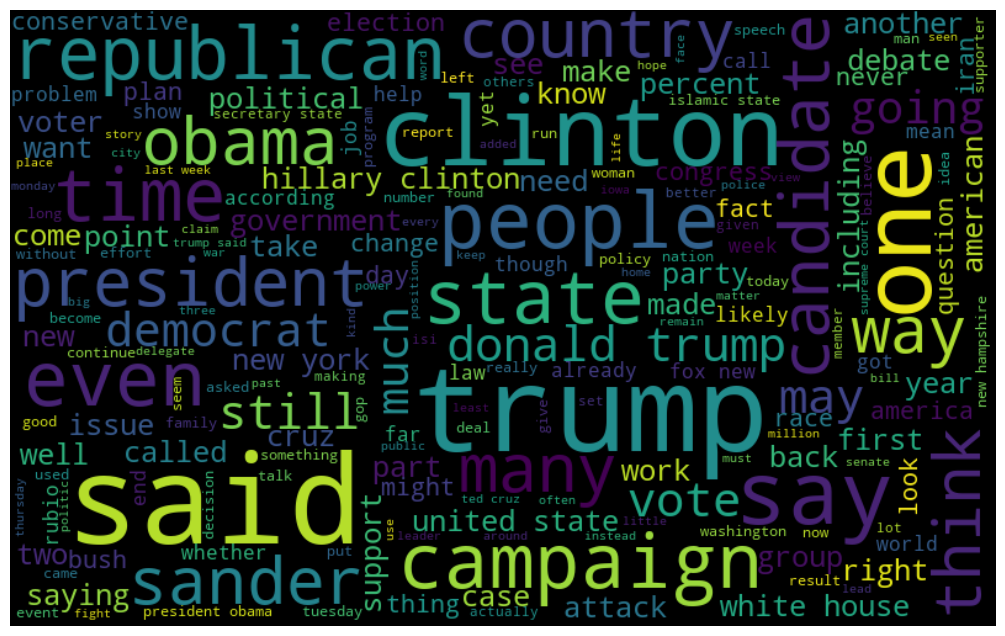

In [18]:
#Word Cloud for real news

wordcloud=WordCloud(width=800,height=500,random_state=0,max_font_size=100).generate(real_data)

print("*************************************************************************************")
print('Word Cloud For real news data ')
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

*************************************************************************************
Word Cloud For fake news data 


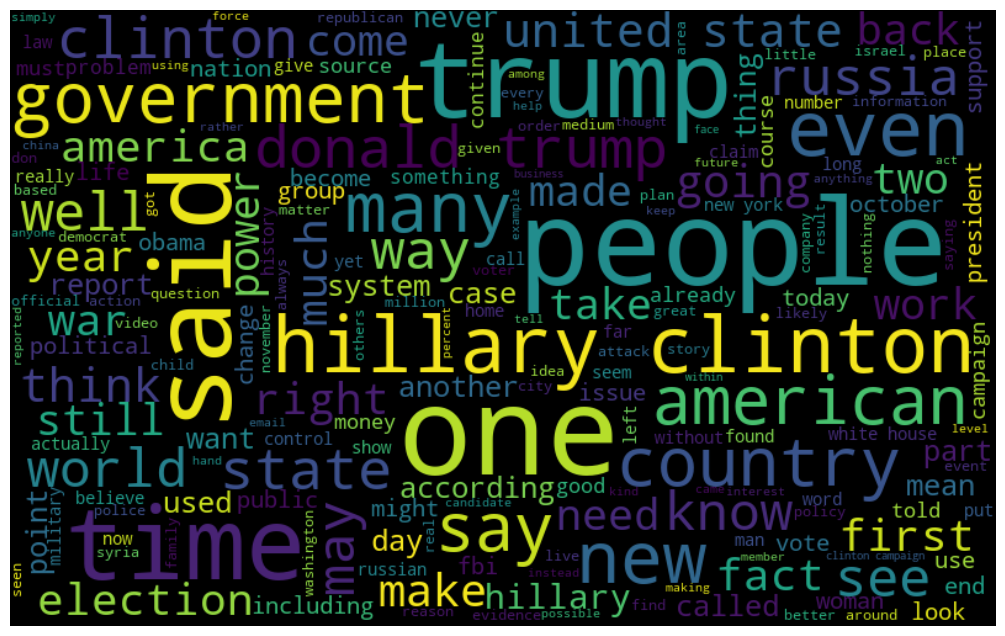

In [19]:
#Word Cloud for fake news

wordcloud=WordCloud(width=800,height=500,random_state=0,max_font_size=100).generate(fake_data)

print("*************************************************************************************")
print('Word Cloud For fake news data ')
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


## Inference:

#### real news data has words like sander, president, obama, campaign, republican, and candidate 
#### fake news data has words like government, american, time, country, world, and election
### there're some of mutuals words between the two classes like trump, people, said, clinton
*********************************************************************************************************************

### One Word Count

*************************************************************************************
Visualize top 20 frequent words used in real news data


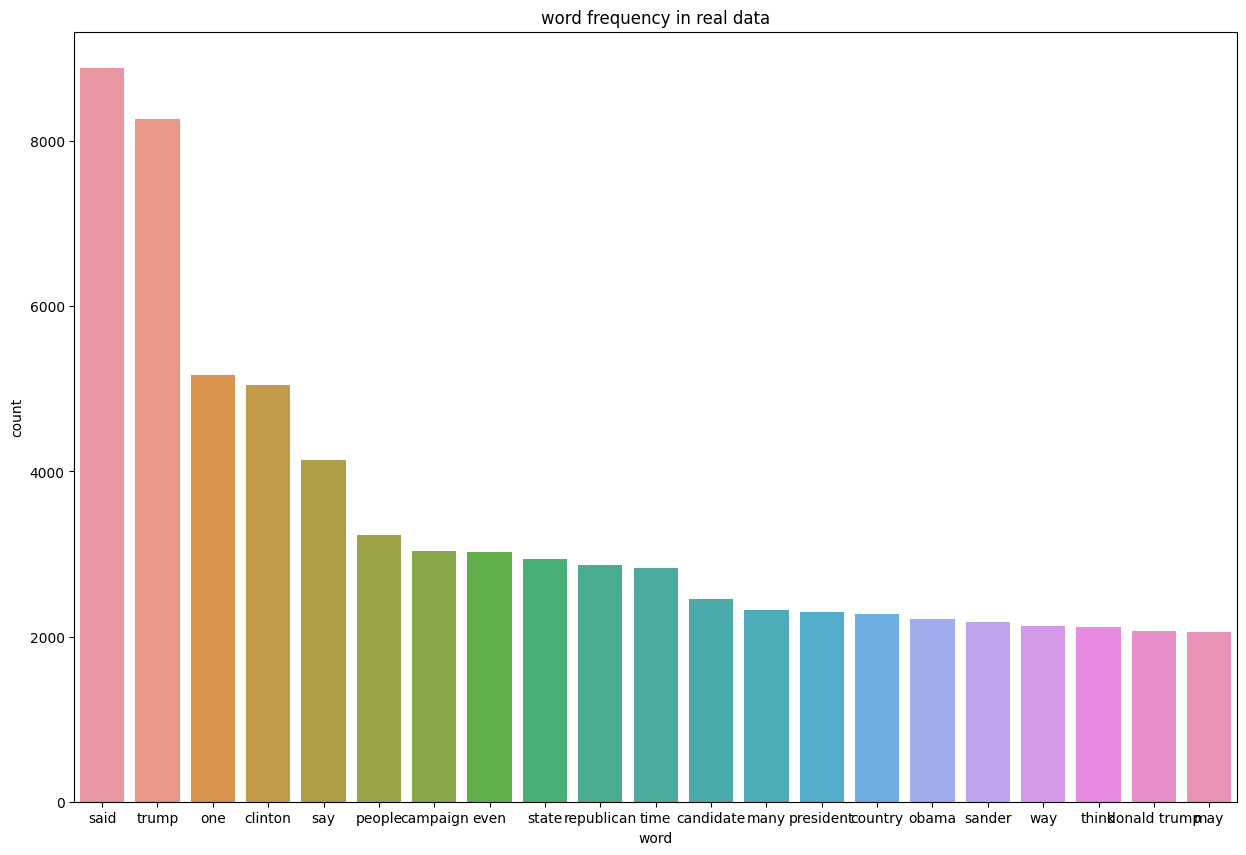

In [20]:
#one word count for real news data
one_word_freq(real_data,"real news data")

*************************************************************************************
Visualize top 20 frequent words used in fake news data


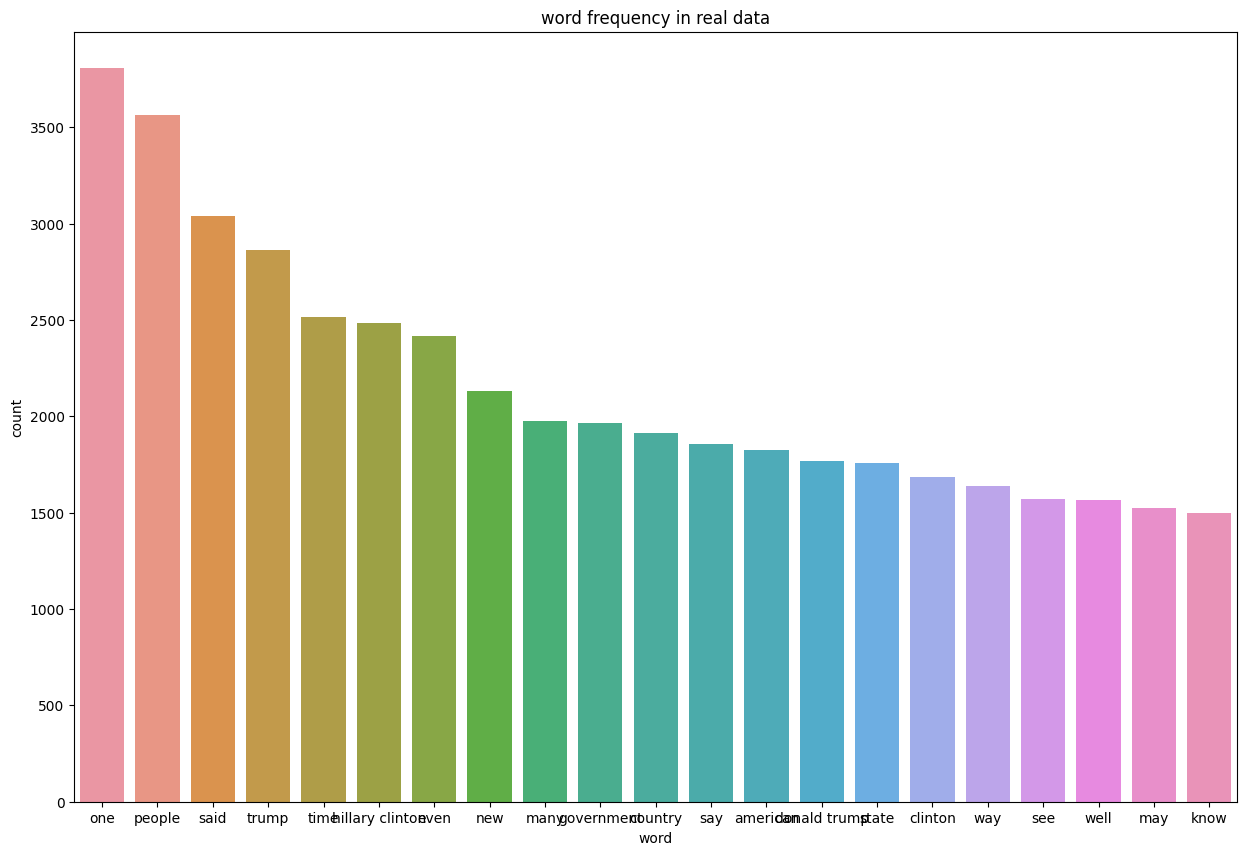

In [21]:
#one word count for fake news data
one_word_freq(fake_data,"fake news data")

#### Inference:

##### real news data has words like people, even, state, many, way,think
##### fake news data has words like new, know, see, well, hillary 
*********************************************************************************************************************

# dataset split

In [22]:
#required libraries
from sklearn.model_selection import train_test_split

X=df['cleaned_txt'].astype(str)
y=df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0,stratify=y)



***********************************************************************************************************************
# Offline Learning
***********************************************************************************************************************


# Feature Extraction

In [23]:
#required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Setting up Term Frequency - Inverse Document Frequency Vectorizer
vectorizer = TfidfVectorizer( ngram_range = (1,2))

# Fit and transform training and testing sets 
tf_X_train=vectorizer.fit_transform(X_train)
tf_X_test=vectorizer.transform(X_test)




# Model Training and Evaluation


In [24]:
#required libraries
from sklearn.linear_model import PassiveAggressiveClassifier

#Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [25]:
def evaluate_model(y_test,y_test_pred):
    #test accuracy using accuracy score metric
    test_acc=round(accuracy_score(y_test,y_test_pred),2)*100
    print("testing accuracy = ",test_acc)
    
    #f1-score
    f1_s=round(f1_score(y_test, y_test_pred),2)*100
    print("f1-score = ",f1_s)

    #evaluate model using confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
    plt.show()
    print(classification_report(y_test,y_test_pred))

def train_evaluate_model(model,X_train=tf_X_train,y_train=y_train,X_test=tf_X_test,y_test=y_test):
    #train model on train data
    model.fit(X_train,y_train)
    
    #prediction over trian data
    y_train_pred = model.predict(X_train)
    
    #prediction over test data
    y_test_pred = model.predict(X_test)
    
    #train accuracy using accuracy score metric
    train_acc=round(accuracy_score(y_train,y_train_pred),2)*100
    print("training accuracy = ",train_acc)

    evaluate_model(y_test,y_test_pred)
    


### Passive Aggressive Model

training accuracy =  100.0
testing accuracy =  95.0
f1-score =  95.0


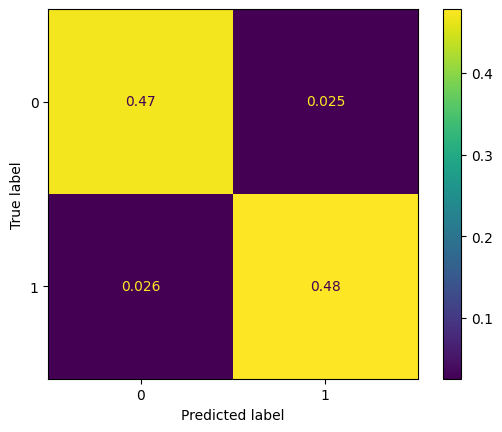

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       780
           1       0.95      0.95      0.95       793

    accuracy                           0.95      1573
   macro avg       0.95      0.95      0.95      1573
weighted avg       0.95      0.95      0.95      1573



In [26]:

# Setting up Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(random_state=0)

train_evaluate_model(pac)

*****************************************************************************************************************************
# Online Learning using River 
***********************************************************************************************************************


In [27]:
#required libraries
from river.linear_model import PAClassifier

from river.compose import Pipeline

from river.metrics import ClassificationReport

from river.feature_extraction import BagOfWords,TFIDF

## Model Training and Evaluation

In [28]:

def evaluate_model_online(report,y_test,y_pred):
    for yt,yp in zip(y_test,y_pred):
        report=report.update(yt,yp)
    print(report)
    

In [29]:
def train_evaluate_model_online(pipeline,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
   
    #training model on one data object at a time
    for txt,label in zip(X_train,y_train):
        pipeline.learn_one(txt,label)
        
    #prediction on test set
    y_pred=[]

    for txt,label in zip(X_test,y_test):
        #predict on data object
        pred=pipeline.predict_one(txt)
        y_pred.append(pred)

        #train on the previously predicted data object
        pipeline.learn_one(txt,label)

        

    #model evaluation
    report=ClassificationReport()
    evaluate_model_online(report,y_test,y_pred)
    

### Functions for updating the model with new training or testing data


In [30]:
def update_train_data(pipeline,new_x,new_y):
    for txt,label in zip(new_x,new_y):
        pipeline.learn_one(txt,label)

In [31]:
def update_test_data(pipeline,new_x,new_y,report):
    for txt,label in zip(new_x,new_y):
        #predict on data object
        pred=pipeline.predict_one(txt)
        y_pred.append(pred)
        #train on the previously predicted data object
        pipe.learn_one(txt,label)
        #update evaulation report
        evaluate_model_online(report,new_y,y_pred)

## TF-IDF for Feature Extraction

In [32]:
#using td-idf vectorizer and passive aggrisive classifier
from river.feature_extraction import TFIDF

vectorizer=TFIDF(ngram_range = (1,3))
model=PAClassifier()

#prepare pipeline
pipe=Pipeline(("vectorizer",vectorizer),("model",model))
    

train_evaluate_model_online(pipe)

           Precision   Recall   F1       Support  
                                                  
       0      87.31%   89.10%   88.20%       780  
       1      89.06%   87.26%   88.15%       793  
                                                  
   Macro      88.19%   88.18%   88.18%            
   Micro      88.18%   88.18%   88.18%            
Weighted      88.19%   88.18%   88.18%            

                 88.18% accuracy                  


## BagOfWords for Feature Extraction

In [33]:
#using bag of words vectorizer and passive aggrisive classifier
from river.feature_extraction import BagOfWords

vectorizer=BagOfWords(ngram_range = (1,3))
model=PAClassifier()

#prepare pipeline
pipe=Pipeline(("vectorizer",vectorizer),("model",model))
    

train_evaluate_model_online(pipe)
    

           Precision   Recall   F1       Support  
                                                  
       0      89.40%   91.92%   90.64%       780  
       1      91.83%   89.28%   90.54%       793  
                                                  
   Macro      90.62%   90.60%   90.59%            
   Micro      90.59%   90.59%   90.59%            
Weighted      90.63%   90.59%   90.59%            

                 90.59% accuracy                  


***********************************************************************************************************************

## Inference:

### we can see in the online learning that using bag of words vectorizer (90.5%) has better performance than TF-IDF vetorizer (88%)
### offline learning in this case gives us testing accuracy of (95%) which is better than the testing accuracy of online learning (90.5%)
*********************************************************************************************************************
